Text(0, 0.5, '$p$')

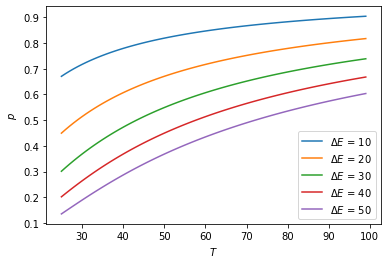

In [1]:
import numpy as np
import matplotlib.pyplot as plt
deltaEList = [10,20,30,40,50]
for deltaE in deltaEList:
    p_list = []
    t_list = [i for i in range(25,100)]
    for T in range(25,100):
        p_list.append(np.exp(- deltaE/T))
    plt.plot(t_list,p_list,label = r'$\Delta E$ = ' + str(deltaE))
plt.legend()
plt.xlabel(r'$T$')
plt.ylabel(r'$p$')

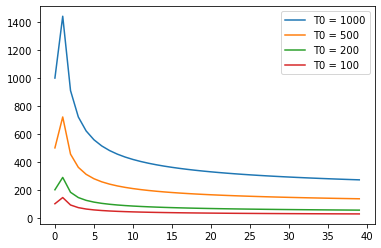

In [2]:
T0_list = [1000,500,200,100]
for T0 in T0_list:
    T_list = []
    t_list = [i for i in range(1,40)]
    T_list.append(T0)
    for t in t_list:
        T_list.append(T0/np.log(t+1))
    plt.plot([i for i in range(40)],T_list,label = 'T0 = '+ str(T0))
plt.legend()

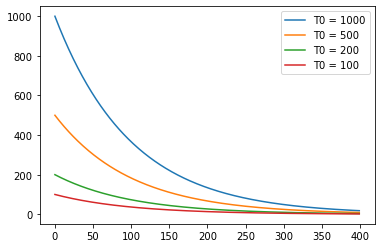

In [3]:
T0_list = [1000,500,200,100]
alpha = 0.99
for T0 in T0_list:
    T_list = []
    t_list = [i for i in range(1,400)]
    T_list.append(T0)
    for t in t_list:
        T_list.append(alpha * T_list[-1] )
    plt.plot([i for i in range(400)],T_list,label = 'T0 = '+ str(T0))
plt.legend()

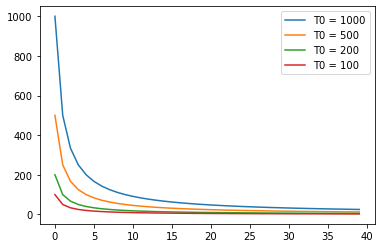

In [4]:
T0_list = [1000,500,200,100]
alpha = 0.99
for T0 in T0_list:
    T_list = []
    t_list = [i for i in range(1,40)]
    T_list.append(T0)
    for t in t_list:
        T_list.append(T0/(t+1))
    plt.plot([i for i in range(40)],T_list,label = 'T0 = '+ str(T0))
plt.legend()

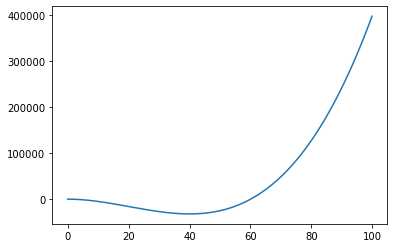

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
 
#define aim function
def aimFunction(x):
    y=x**3-60*x**2-4*x+6
    return y
x=[i/10 for i in range(1000)]
y=[0 for i in range(1000)]
for i in range(1000):
    y[i]=aimFunction(x[i])
 
plt.plot(x,y)

In [6]:
T=1000 #initiate temperature
Tmin=10 #minimum value of terperature
x=np.random.uniform(low=0,high=100)#initiate x
k=50 #times of internal circulation 
y=0#initiate result
t=0#time
while T>=Tmin:
    for i in range(k):
        #calculate y
        y=aimFunction(x)
        #generate a new x in the neighboorhood of x by transform function
        xNew=x+np.random.uniform(low=-0.055,high=0.055)*T
        if (0<=xNew and xNew<=100):
            yNew=aimFunction(xNew)
            if yNew-y<0:
                x=xNew
            else:
                #metropolis principle
                p=math.exp(-(yNew-y)/T)
                r=np.random.uniform(low=0,high=1)
                if r<p:
                    x=xNew
    t+=1
#     print (t)
    T=1000/(1+t)
    
print ('x:',x,'|y:',aimFunction(x))

x: 39.83648406351726 |y: -32151.746060566093


In [7]:
num = 52
solutionnew = np.arange(num)
solutionnew

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

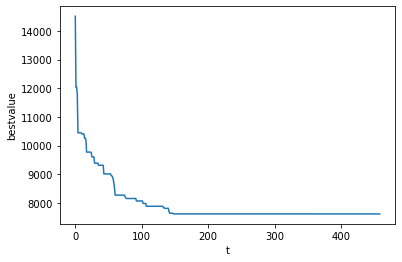

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import pdb
 
"旅行商问题 ( TSP , Traveling Salesman Problem )"
coordinates = np.array([[565.0,575.0],[25.0,185.0],[345.0,750.0],[945.0,685.0],[845.0,655.0],
                        [880.0,660.0],[25.0,230.0],[525.0,1000.0],[580.0,1175.0],[650.0,1130.0],
                        [1605.0,620.0],[1220.0,580.0],[1465.0,200.0],[1530.0,  5.0],[845.0,680.0],
                        [725.0,370.0],[145.0,665.0],[415.0,635.0],[510.0,875.0],[560.0,365.0],
                        [300.0,465.0],[520.0,585.0],[480.0,415.0],[835.0,625.0],[975.0,580.0],
                        [1215.0,245.0],[1320.0,315.0],[1250.0,400.0],[660.0,180.0],[410.0,250.0],
                        [420.0,555.0],[575.0,665.0],[1150.0,1160.0],[700.0,580.0],[685.0,595.0],
                        [685.0,610.0],[770.0,610.0],[795.0,645.0],[720.0,635.0],[760.0,650.0],
                        [475.0,960.0],[95.0,260.0],[875.0,920.0],[700.0,500.0],[555.0,815.0],
                        [830.0,485.0],[1170.0, 65.0],[830.0,610.0],[605.0,625.0],[595.0,360.0],
                        [1340.0,725.0],[1740.0,245.0]])
 
#得到距离矩阵的函数
def getdistmat(coordinates):
    num = coordinates.shape[0] #52个坐标点
    distmat = np.zeros((52,52)) #52X52距离矩阵
    for i in range(num):
        for j in range(i,num):
            distmat[i][j] = distmat[j][i]=np.linalg.norm(coordinates[i]-coordinates[j])
    return distmat
 
def initpara():
    alpha = 0.99
    t = (1,100)
    markovlen = 1000
 
    return alpha,t,markovlen
num = coordinates.shape[0]
distmat = getdistmat(coordinates) #得到距离矩阵
 
 
solutionnew = np.arange(num)
#valuenew = np.max(num)
 
solutioncurrent = solutionnew.copy()
valuecurrent =99000  #np.max这样的源代码可能同样是因为版本问题被当做函数不能正确使用，应取一个较大值作为初始值
#print(valuecurrent)
 
solutionbest = solutionnew.copy()
valuebest = 99000 #np.max
 
alpha,t2,markovlen = initpara()
t = t2[1]
 
result = [] #记录迭代过程中的最优解
while t > t2[0]:
    for i in np.arange(markovlen):
 
        #下面的两交换和三交换是两种扰动方式，用于产生新解
        if np.random.rand() > 0.5:# 交换路径中的这2个节点的顺序
            # np.random.rand()产生[0, 1)区间的均匀随机数
            while True:#产生两个不同的随机数
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1)))
                ## print(loc1,loc2)
                if loc1 != loc2:
                    break
            solutionnew[loc1],solutionnew[loc2] = solutionnew[loc2],solutionnew[loc1]
        else: #三交换
            while True:
                loc1 = np.int(np.ceil(np.random.rand()*(num-1)))
                loc2 = np.int(np.ceil(np.random.rand()*(num-1))) 
                loc3 = np.int(np.ceil(np.random.rand()*(num-1)))
 
                if((loc1 != loc2)&(loc2 != loc3)&(loc1 != loc3)):
                    break
 
            # 下面的三个判断语句使得loc1<loc2<loc3
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
            if loc2 > loc3:
                loc2,loc3 = loc3,loc2
            if loc1 > loc2:
                loc1,loc2 = loc2,loc1
 
            #下面的三行代码将[loc1,loc2)区间的数据插入到loc3之后
            tmplist = solutionnew[loc1:loc2].copy()
            solutionnew[loc1:loc3-loc2+1+loc1] = solutionnew[loc2:loc3+1].copy()
            solutionnew[loc3-loc2+1+loc1:loc3+1] = tmplist.copy()  
 
        valuenew = 0
        for i in range(num-1):
            valuenew += distmat[solutionnew[i]][solutionnew[i+1]]
        valuenew += distmat[solutionnew[0]][solutionnew[51]]
       # print (valuenew)
        if valuenew<valuecurrent: #接受该解
           
            #更新solutioncurrent 和solutionbest
            valuecurrent = valuenew
            solutioncurrent = solutionnew.copy()
 
            if valuenew < valuebest:
                valuebest = valuenew
                solutionbest = solutionnew.copy()
        else:#按一定的概率接受该解
            if np.random.rand() < np.exp(-(valuenew-valuecurrent)/t):
                valuecurrent = valuenew
                solutioncurrent = solutionnew.copy()
            else:
                solutionnew = solutioncurrent.copy()
    t = alpha*t
    result.append(valuebest)
    # print (t) #程序运行时间较长，打印t来监视程序进展速度
#用来显示结果
plt.plot(np.array(result))
plt.ylabel("bestvalue")
plt.xlabel("t")
plt.show()